<a href="https://colab.research.google.com/github/mt508/machine-learning-/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.datasets import fetch_openml
mnist= fetch_openml('mnist_784',as_frame=False)

In [3]:
X,Y=mnist.data , mnist.target

In [4]:
X.shape

(70000, 784)

In [5]:
def plot_digit(image_data):
  reshape_img=image_data.reshape(28,28)
  plt.imshow(reshape_img,cmap='binary')
  plt.axis('off')


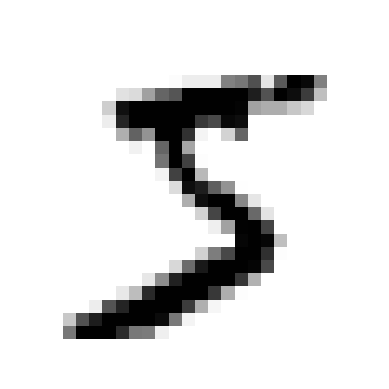

In [6]:
some_digit=X[0]
plot_digit(some_digit)

this is look like 5 let check

In [7]:
Y[0]

'5'

label 1st image is 5 now it proof this above image is 5

In [8]:
X_train,X_test,Y_train,Y_test=X[:60000],X[60000:],Y[:60000],Y[60000:]

above code we make test set and train set with label 60000 image in train and 10000 in test set

In [9]:
y_train_5=(Y_train=='5')
y_test_5=(Y_test=='5')

this will classify number is 5 or not 5


In [10]:
from sklearn.linear_model import SGDClassifier
sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

In [11]:
sgd_clf.predict([some_digit])

array([ True])

model pridict this image is 5

In [12]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [13]:
from sklearn.dummy import  DummyClassifier
dummy_clf=DummyClassifier()


In [14]:
dummy_clf.fit(X_train,y_train_5)

DummyClassifier()

In [15]:
cross_val_score(dummy_clf,X_train,y_train_5,cv=3,scoring='accuracy')

array([0.90965, 0.90965, 0.90965])

this happening because its only 10% are 5 hence model always say not 5 so it 90% correct.

now we use confusion matrix





In [16]:
from sklearn.model_selection import cross_val_predict

In [17]:
y_predict=cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

In [18]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_train_5,y_predict)
cm

array([[53892,   687],
       [ 1891,  3530]])

In [19]:
y_train_perfect_predict=y_train_5
confusion_matrix(y_train_5,y_train_perfect_predict)

array([[54579,     0],
       [    0,  5421]])

In [20]:
from sklearn.metrics import precision_score,recall_score
precision_score(y_train_5,y_predict)


0.8370879772350012

In [21]:
recall_score(y_train_5,y_predict)

0.6511713705958311

In [22]:
from sklearn.metrics import f1_score
f1_score(y_train_5,y_predict)

0.7325171197343847

In [23]:
y_score=sgd_clf.decision_function([some_digit])
y_score

array([2164.22030239])

In [24]:
threshold=0
y_some_digit_pred=(y_score>threshold)
y_some_digit_pred

array([ True])

In [25]:
threshold=3000
y_some_digit_pred=(y_score>threshold)
y_some_digit_pred

array([False])

In [26]:
y_scores=cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,method='decision_function')

In [27]:
from sklearn.metrics import  precision_recall_curve
precision,recalls,threshold=precision_recall_curve(y_train_5,y_scores)

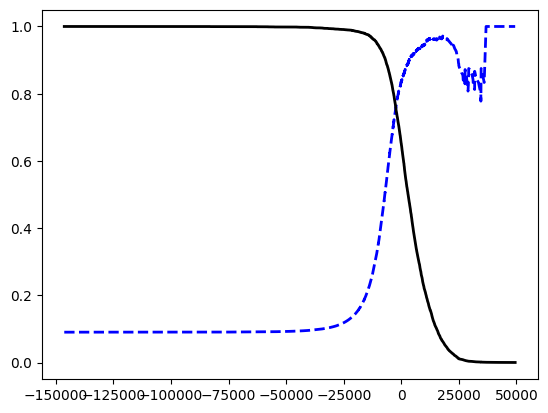

In [28]:
plt.plot(threshold, precision[:-1], "b--", label="Precision", linewidth=2)
plt.plot(threshold, recalls[:-1], "k-", label="Recall", linewidth=2)


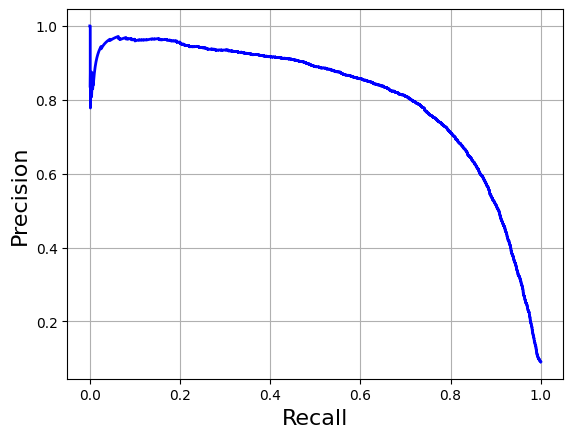

In [29]:
plt.plot(recalls, precision, "b-", linewidth=2)
plt.xlabel("Recall", fontsize=16)
plt.ylabel("Precision", fontsize=16)
plt.grid(True)

In [30]:
idx_for_90_precision=np.argmax(precision>=0.90)
threshold_for_90_precision=threshold[idx_for_90_precision]

In [31]:
threshold_for_90_precision

np.float64(3370.0194991439557)

In [32]:
y_train_pred_90= (y_scores>=threshold_for_90_precision)

recall_score(y_train_5,y_train_pred_90)

0.4799852425751706

In [33]:
precision_score(y_train_5,y_train_pred_90)

0.9000345901072293

In [34]:
from sklearn.metrics import roc_curve
fpr,tpr,threshold=roc_curve(y_train_5,y_scores)

In [36]:
idx_for_threshold_90=np.argmax(threshold<=threshold_for_90_precision)
tpr_90,fpr_90=tpr[idx_for_threshold_90],fpr[idx_for_threshold_90]

Text(0, 0.5, 'true positive rate')

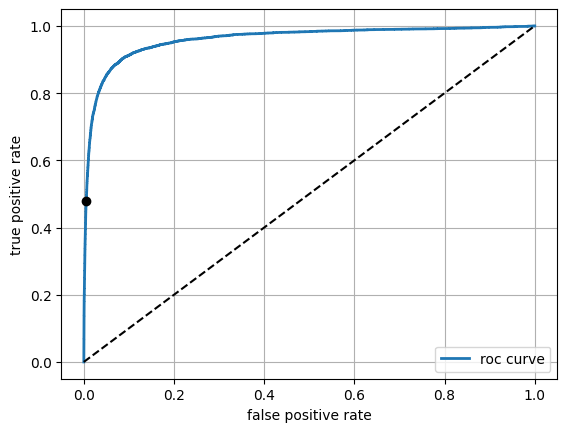

In [37]:
plt.plot(fpr,tpr,linewidth=2,label="roc curve")
plt.plot([0,1],[0,1],'k--')
plt.plot([fpr_90],[tpr_90],'ko')
plt.grid(True)
plt.legend()
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')

In [38]:
from sklearn.metrics import auc

roc_auc = auc(fpr, tpr)
print("ROC AUC:", roc_auc)


ROC AUC: 0.9604938554008616


In [41]:
from sklearn.ensemble import RandomForestClassifier
forest_clf=RandomForestClassifier(random_state=42)

In [42]:
y_prob_forest=cross_val_predict(forest_clf,X_train,y_train_5,cv=3,method='predict_proba')

In [43]:
y_prob_forest[:2]

array([[0.11, 0.89],
       [0.99, 0.01]])

1st image has +ve probblity of 89%

2nd with 99% neg probablity



In [48]:
y_score_predict_forest = y_prob_forest[:, 1]
precision_forest, recall_forest, threshold_forest = precision_recall_curve(y_train_5, y_score_predict_forest)

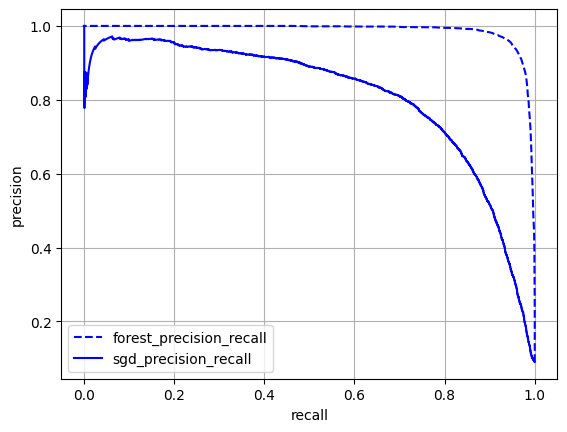

In [49]:
plt.plot(recall_forest,precision_forest,"b--",label="forest_precision_recall")
plt.plot(recalls,precision,"b-",label="sgd_precision_recall")
plt.xlabel("recall")
plt.ylabel("precision")
plt.grid(True)
plt.legend()

In [50]:
y_train_pred_forest=y_prob_forest[:,1]>=0.5
f1_score(y_train_5,y_train_pred_forest)

0.9274509803921569

In [54]:
recall_score(y_train_5,y_train_pred_forest)

0.8725327430363402

In [52]:
from sklearn.metrics import roc_auc_score

In [53]:
roc_auc_score(y_train_5,y_score_predict_forest)

np.float64(0.9983436731328145)